<a href="https://colab.research.google.com/github/pmargarete/CCMACLRL_EXERCISES_COM222/blob/main/Paat_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [12]:
#Load first
df = pd.read_csv('iris.csv')

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#Removes Id Column
df.drop(columns='Id', inplace=True)

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

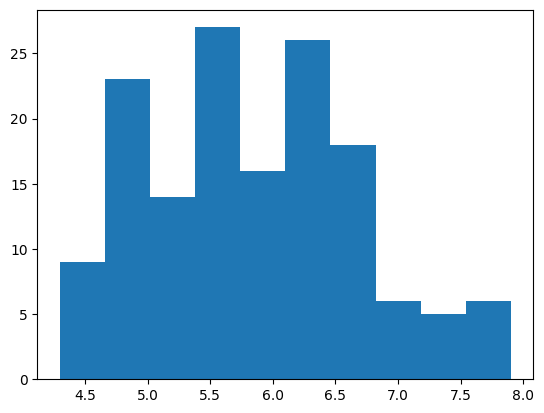

In [21]:
#

plt.hist(df['SepalLengthCm'])

Text(0.5, 0, 'SepalLength')

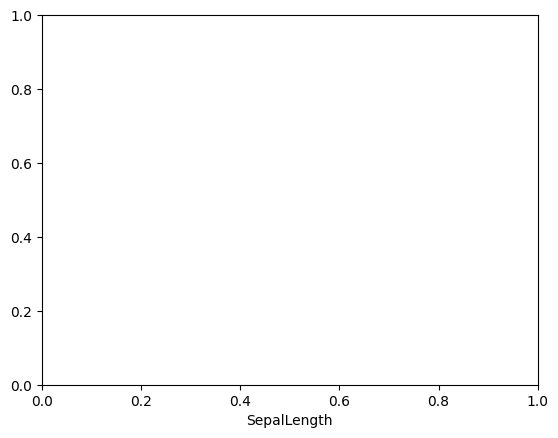

In [22]:
plt.xlabel('SepalLength')

Text(0, 0.5, 'Number of Rows')

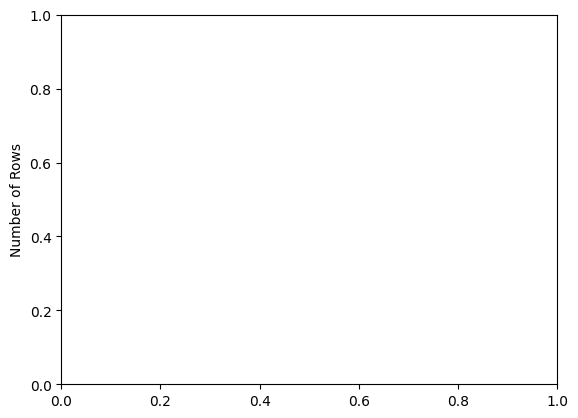

In [23]:
plt.ylabel('Number of Rows')

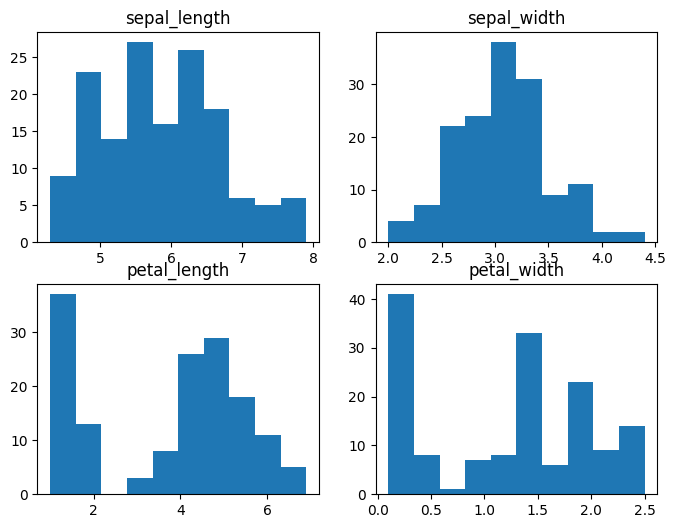

In [25]:
fig, ax = plt.subplots(2,2, figsize = (8,6))

ax[0,0].hist(df["SepalLengthCm"])
ax[0,1].hist(df["SepalWidthCm"])
ax[1,0].hist(df["PetalLengthCm"])
ax[1,1].hist(df["PetalWidthCm"])

ax[0,0].set_title("sepal_length")
ax[0,1].set_title("sepal_width")
ax[1,0].set_title("petal_length")
ax[1,1].set_title("petal_width")

plt.show()

In [27]:
colors = {'Iris-setosa': 'red',
          'Iris-virginica': 'blue',
          'Iris-versicolor': 'green'}

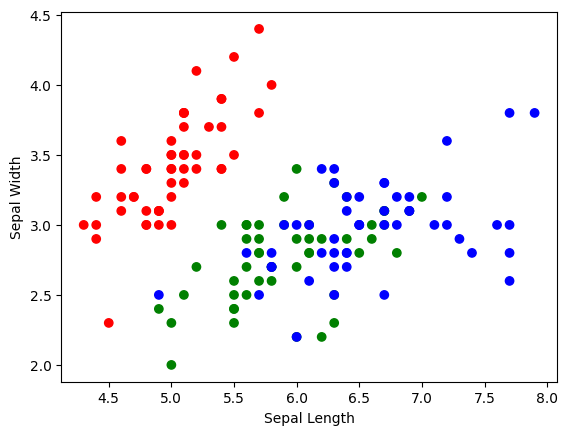

In [28]:
#SEPAL
plt.scatter(df['SepalLengthCm'],
            df['SepalWidthCm'],
            c = df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

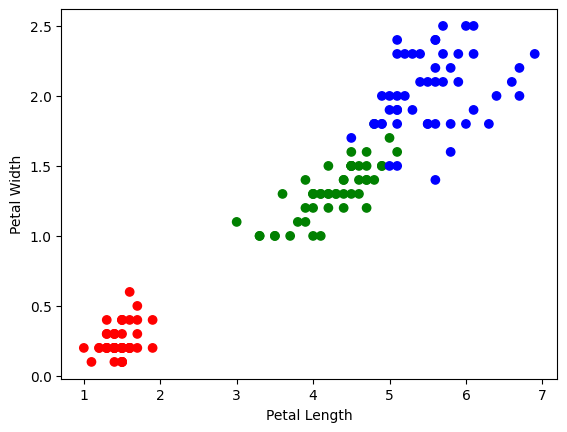

In [29]:
#PETAL
plt.scatter(df['PetalLengthCm'],
            df['PetalWidthCm'],
            c = df['Species'].map(colors))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


4. Split the dataset into a training set and a testing set

In [46]:
X = df.drop(columns=['Species']).values

y = df['Species'].values

In [ ]:
X

In [48]:
print(X.shape)


(150, 4)


In [62]:
print(X.ndim)

2


In [56]:
#TRAIN

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [57]:
print(X_train.shape)


(120, 4)


In [58]:
print(y_train.shape)


(120,)


In [59]:
print(X_test.shape)


(30, 4)


In [60]:
print(y_test.shape)

(30,)


5. Train the model

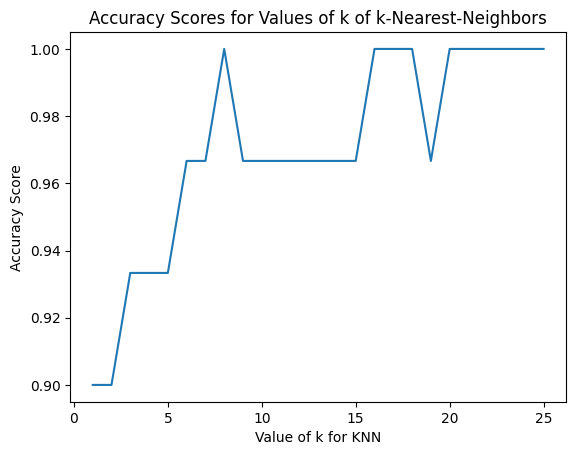

In [64]:
#
k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  #TRAIN THE MODEL
  knn.fit(X_train, y_train) # puts training data to machine algorithm

  #TEST THE MODEL
  y_pred = knn.predict(X_test) # pases the test data
  scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

6. Test the model

In [71]:
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) # pases the test data
metrics.accuracy_score(y_test, y_pred)


1.0

In [72]:
knn.predict([[2, 2, 1, 1]])

array(['Iris-setosa'], dtype=object)